<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/Seasonal_Trend_Decomposition_using_LOESS_(STL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we investigate a commonly used tool in time series called STL.
This is method is "Seasonal Trend Decomposition".
<br><br>
---

Written by: Arjang Fahim
Date: 9/12/2022
Last update: 9/12/2022

In [14]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
from google.colab import drive

In [16]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Data

In [27]:
def parser(s):
  return datetime.strptime(s, '%Y-%m')

In [31]:
filepath = '/content/drive/MyDrive/Colab Notebooks/TimeSeries/data/ice_cream_interest.csv'
ice_cream_interest = pd.read_csv(filepath)
ice_cream_interest = (ice_cream_interest.assign(Date=lambda d: pd.to_datetime(d['month'])).set_index('Date').drop(columns='month'))
ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))

            interest
Date                
2004-01-01        13
2004-02-01        15
2004-03-01        17
2004-04-01        19
2004-05-01        22
...              ...
2020-04-01        55
2020-05-01        71
2020-06-01        81
2020-07-01        90
2020-08-01        76

[200 rows x 1 columns]


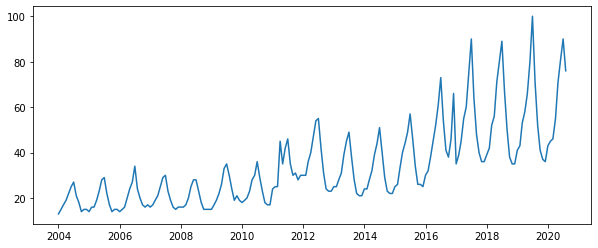

In [30]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

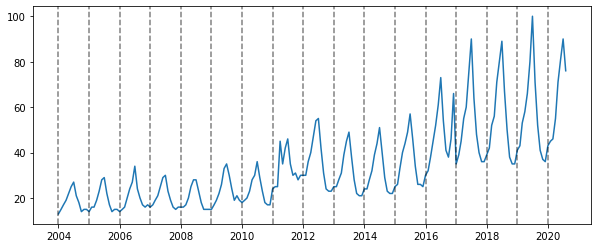

In [32]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

### Visual inspection: Mid-2011 and Late-2016
By visually checking the plot we can see that the first anomaly happes in the slot of 2011 and 2012. Also late 2016

### Performing STL decomp

In [33]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [35]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

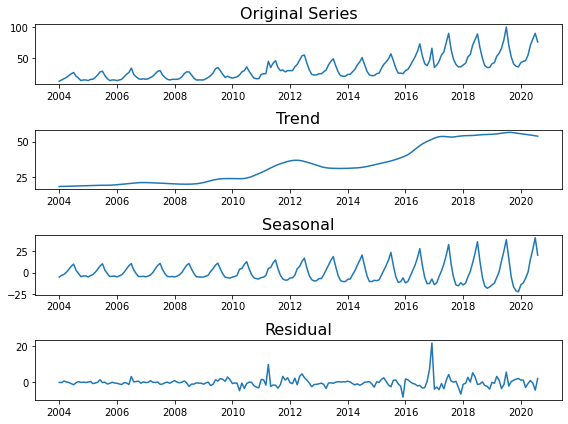

In [36]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()


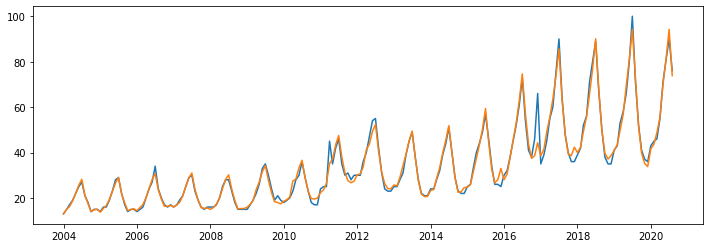

In [37]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

# Anomaly Detection

In [38]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(731459.0, 737760.0)

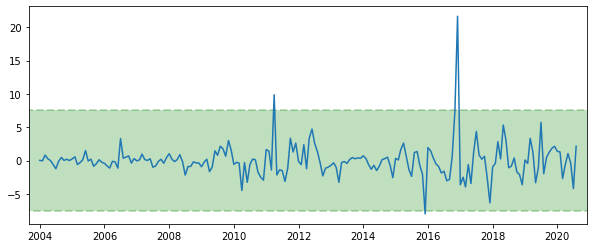

In [39]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [40]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

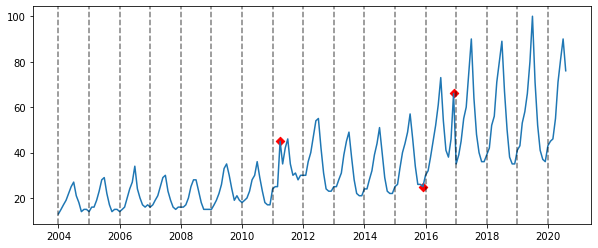

In [41]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')

In [42]:
anomalies


,interest
Date,
2011-04-01,45
2015-12-01,25
2016-12-01,66
